In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('CSV_files/titanic.csv')
# data.head(10)

In [2]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [3]:
print(data.value_counts(['Embarked']))
print(data.value_counts(['Survived']))

Embarked
S           270
C           102
Q            46
Name: count, dtype: int64
Survived
0           266
1           152
Name: count, dtype: int64


In [4]:
data['Fare'] = data['Fare'].fillna(3.445)

In [5]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [6]:
data = data.dropna(subset=['Age', 'Cabin'], how='all')
#Removes empty values where age and cabin are empty

In [7]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              4
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          245
Embarked         0
dtype: int64


In [8]:
data = data.dropna(subset=['Age'])  # Removes rows where 'Age' is NaN

In [9]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          245
Embarked         0
dtype: int64


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,1100.063253,0.382530,2.144578,30.272590,0.481928,0.397590,40.869024
std,122.763173,0.486739,0.846283,14.181209,0.874084,0.810651,61.170698
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,992.750000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,1099.500000,0.000000,2.000000,27.000000,0.000000,0.000000,15.950000
75%,1210.250000,1.000000,3.000000,39.000000,1.000000,1.000000,40.160425
max,1307.000000,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

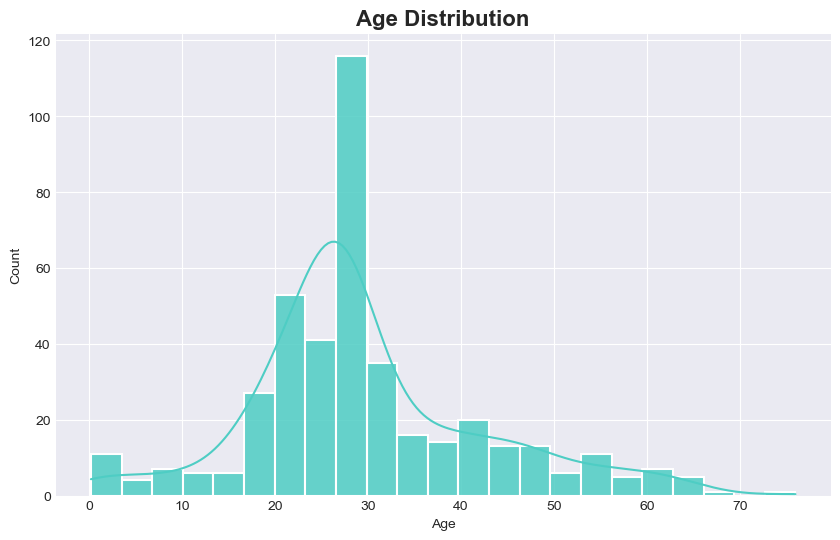

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data['Age'],
    color=np.random.choice(['#FF6B6B', '#4ECDC4', '#FFD166']),
    edgecolor='white',
    linewidth=1.5,
    alpha=0.85,
    kde=True
)

plt.title("Age Distribution", fontsize=16, fontweight='bold')
sns.despine()
plt.savefig("Age distribution.png", dpi=300)
plt.show()

C:\Users\Ken\AppData\Local\Temp\ipykernel_6420\2691328117.py:28: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ken\AppData\Local\Temp\ipykernel_6420\2691328117.py:29: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.savefig("Correlation Heatmap.png", dpi=300)
C:\Users\Ken\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


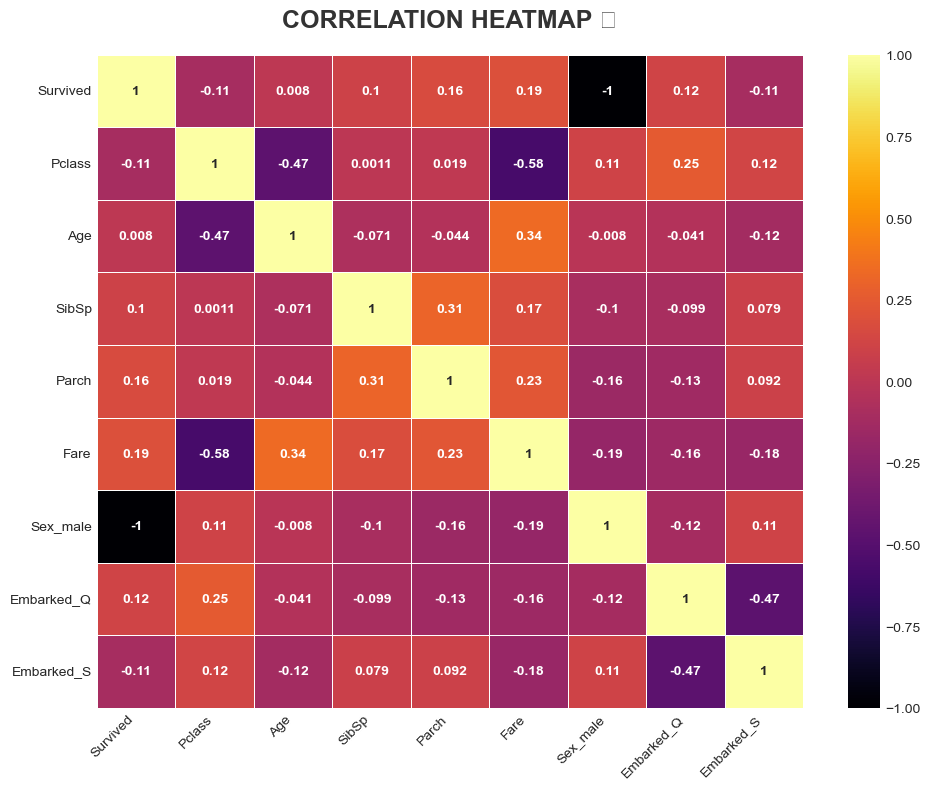

In [28]:
cmap = np.random.choice(['coolwarm', 'viridis', 'magma', 'plasma', 'inferno'])

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    data.corr(), 
    annot=True, 
    cmap=cmap,
    annot_kws={'size': 10, 'weight': 'bold'},
    linewidths=0.5, 
    linecolor='white',
    vmin=-1, 
    vmax=1,
    center=0
)

# Flashy title
plt.title(
    "CORRELATION HEATMAP 🔥", 
    fontsize=18, 
    fontweight='bold', 
    pad=20,
    color='#333333'
)

# Rotate x-labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig("Correlation Heatmap.png", dpi=300)
plt.show();

In [14]:
data = data.drop_duplicates(subset=['Name'], keep='first')

In [15]:
data.duplicated().sum()

0

In [16]:
data.drop(columns='Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,S


In [17]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1


In [18]:
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Pclass'] = label_encoder.fit_transform(data['Pclass'])  # Converts 1, 2, 3 into 0, 1, 2

# Label Encoding for Sex
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Converts 'male' -> 1, 'female' -> 0


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz

# Load the Titanic dataset
data = pd.read_csv("CSV_files/titanic.csv")

# Drop irrelevant columns
data = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Fill missing values
data["Age"] = data["Age"].fillna(data["Age"].median())  # Use median for Age
data["Fare"] = data["Fare"].fillna(data["Fare"].median())  # Use median for Fare
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])  # Use mode for Embarked

# Encode categorical variables (Sex and Embarked)
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)

# Define features (X) and target (y)
X = data.drop(columns=["Survived"])  # Features (exclude target column)
y = data["Survived"]  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_tree))

# Export the trained Decision Tree to a .dot file
export_graphviz(tree, out_file='decision_tree.dot', 
                feature_names=X.columns, 
                class_names=sorted(y.unique().astype(str)), 
                label='all', 
                rounded=True, filled=True)

DecisionTreeClassifier(max_depth=5, random_state=42)

Decision Tree Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [22]:
cleaned_file = 'titanic_cleaned.csv'
data.to_csv(cleaned_file, index=False)
print(f"\nCleaned dataset saved as '{cleaned_file}'")


Cleaned dataset saved as 'titanic_cleaned.csv'
